In [1]:
import numpy as np
import os
import cv2
from sklearn.utils import shuffle
from keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D

import tensorflow as tf


In [2]:

data_path = "C:/Users/purva/Downloads/archive (3)"
data_list = os.listdir(data_path)

img_data = []

for dataset in os.listdir(data_path):
   
    img_list = os.listdir(os.path.join(data_path, dataset))
    for img in img_list:
        input_img = cv2.imread(os.path.join(data_path, dataset, img))
        
        img_resize = cv2.resize(input_img, (48, 48))
        gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
        

        img_data.append(gray)
input_img = cv2.imread(os.path.join(data_path, dataset, img))



data = np.array(img_data)
data = data.astype('float32')
data = data/255.0
data.shape

(981, 48, 48)

In [3]:
num_class=len(data_list)
num_samples=data.shape[0]

In [4]:

labels=np.ones((num_samples,),dtype='int64')
labels[0:134]=0          #anger
labels[135:188] =1       #contempt
labels[189:365] = 2      #disgust
labels[366:440]=3        #fear
labels[441:647]=4        #happy
labels[648:731]=5       #sad
labels[731:980]=6        #surprise
       

img_labels=to_categorical(labels,num_class) 

# names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

# def getLabel(id):
#     return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

In [5]:
x_img,y_img=shuffle(data,img_labels,random_state=2)

x_train,x_test,y_train,y_test=train_test_split(x_img,y_img,test_size=0.25,random_state= 2)

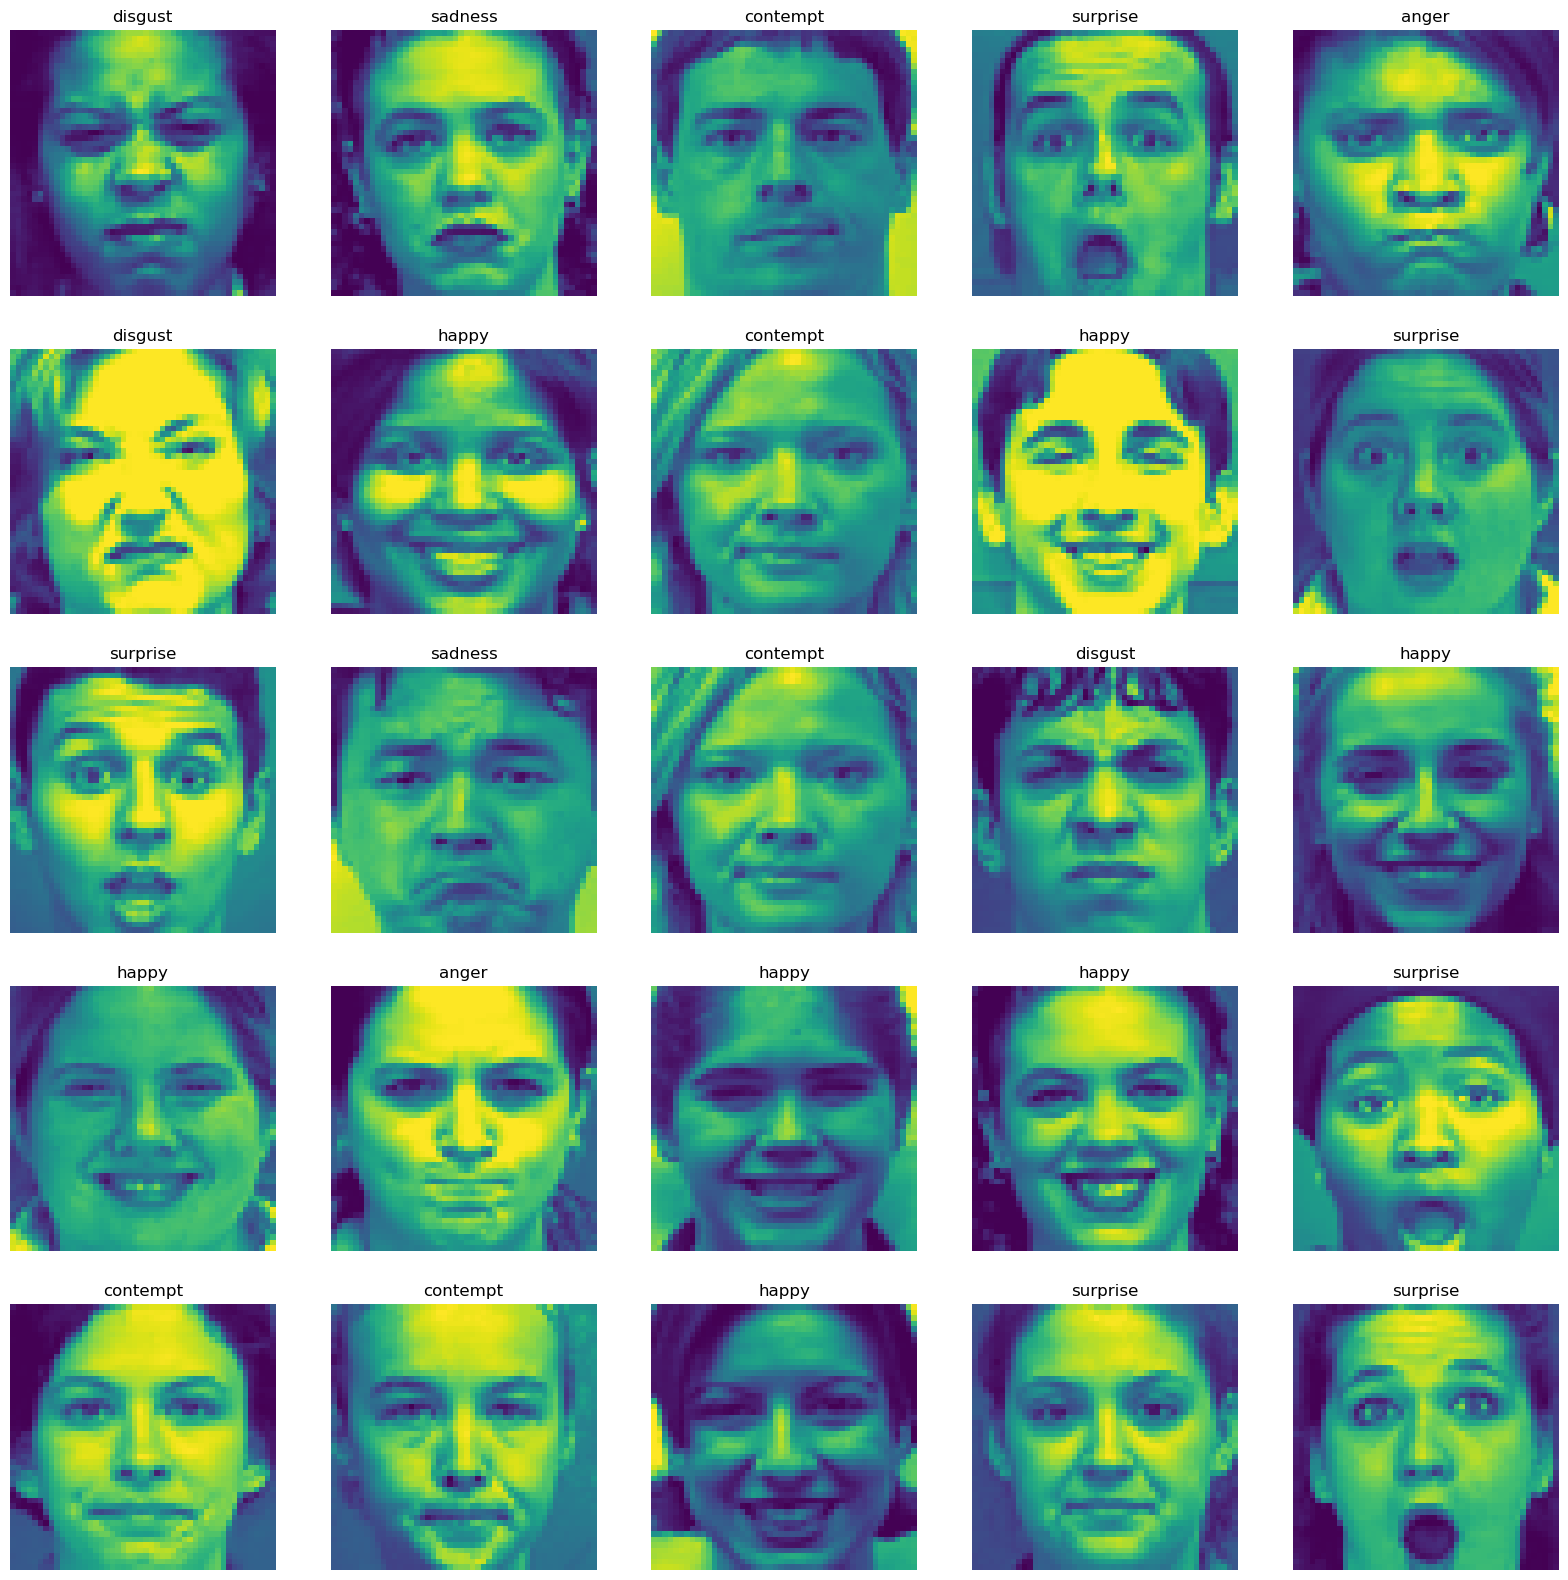

In [6]:
plt.figure(figsize=(20, 20))

if len(x_img) >= 25:
    random_indices = np.random.randint(0, len(x_img), 25)
    for i, j in enumerate(random_indices):
        plt.subplot(5, 5, i + 1)
        plt.imshow(x_img[j])
        plt.axis('off')
        plt.title(data_list[np.argmax(y_img[j])])

plt.show()

In [7]:
# from tensorflow.keras.layers import BatchNormalization


def create_model():
    input_shape = (48, 48,1)

    model = Sequential()
    model.add(Conv2D(16, (5, 5), input_shape=input_shape,
                     padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  metrics=['accuracy'], optimizer='adam')
    return model



In [8]:
model = create_model()

history =model.fit(x_train, y_train, epochs=25,validation_data=(x_test, y_test))




Epoch 1/25


23/23 [==============================] - 3s 37ms/step - loss: 1.8780 - accuracy: 0.2231 - val_loss: 1.7788 - val_accuracy: 0.3130
Epoch 2/25
23/23 [==============================] - 0s 20ms/step - loss: 1.7527 - accuracy: 0.3769 - val_loss: 1.5160 - val_accuracy: 0.5041
Epoch 3/25
23/23 [==============================] - 0s 20ms/step - loss: 1.3754 - accuracy: 0.5184 - val_loss: 1.0172 - val_accuracy: 0.6463
Epoch 4/25
23/23 [==============================] - 0s 20ms/step - loss: 1.0893 - accuracy: 0.5891 - val_loss: 0.7208 - val_accuracy: 0.7154
Epoch 5/25
23/23 [==============================] - 0s 20ms/step - loss: 0.8832 - accuracy: 0.6653 - val_loss: 0.6574 - val_accuracy: 0.7602
Epoch 6/25
23/23 [==============================] - 0s 21ms/step - loss: 0.7476 - accuracy: 0.7320 - val_loss: 0.4945 - val_accuracy: 0.8333
Epoch 7/25
23/23 [==============================] - 0s 21ms/step - loss: 0.6207 - accuracy: 0.7837 - val_loss: 0.3903 - val_accuracy: 0.8740
Epoch 8/

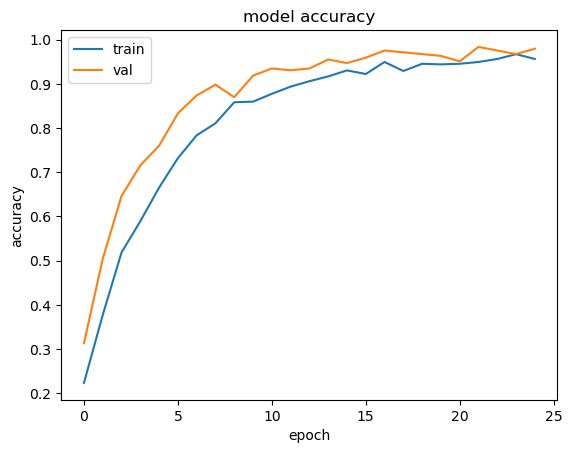

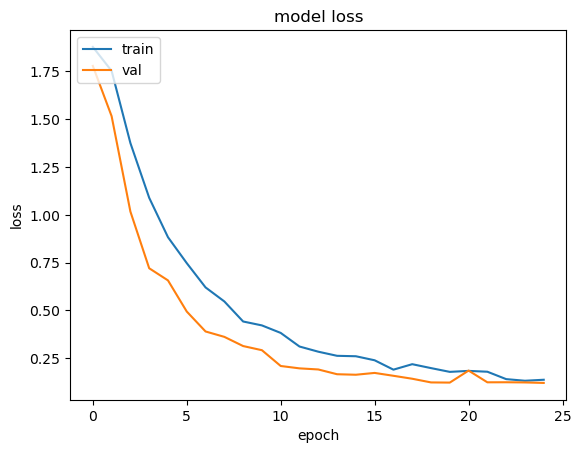

In [9]:
import keras
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])



Test Loss: 0.12131943553686142
Test accuracy: 0.9796748161315918


In [11]:
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)

# # save trained model weight in .h5 file
# model.save_weights('model.h5')

model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

C:\Users\purva\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
from keras.models import model_from_json
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [13]:
label = ['anger','contempt','disgust','fear','happy','sadness','surprise']
def ef(image):
    img = tf.keras.utils.load_img(image, grayscale=True)
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

In [14]:
image = 'C:/Users/purva/Downloads/archive (3)/happy/S133_010_00000014.png'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of happy


C:\Users\purva\anaconda3\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 171ms/step
model prediction is  happy


In [15]:
image = "C:/Users/purva/Downloads/archive (3)/contempt/S504_002_00000009.png"
print("original image is of contempt")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of contempt
1/1 [==============================] - 0s 26ms/step
model prediction is  contempt


In [16]:
image = "C:/Users/purva/Downloads/archive (3)/disgust/S132_005_00000016.png"
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of disgust
1/1 [==============================] - 0s 33ms/step
model prediction is  disgust


In [17]:
image = "C:/Users/purva/Downloads/archive (3)/fear/S999_003_00000055.png"
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of fear
1/1 [==============================] - 0s 27ms/step
model prediction is  contempt


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of fear
1/1 [==============================] - 0s 28ms/step
model prediction is  contempt


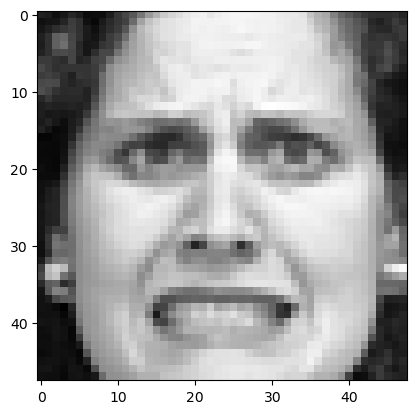

In [19]:
image = "C:/Users/purva/Downloads/archive (3)/fear/S999_003_00000055.png"
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

## real time

In [20]:
import cv2
from keras.models import model_from_json
import numpy as np

# Load the pre-trained model architecture from JSON file
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)



In [ ]:
# Load the pre-trained model weights
model.load_weights("emotiondetector.h5")

# Load the Haar cascade classifier for face detection
# haar_file = cv2.data.haarcascades + "C:/Users/purva/Downloads/haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Define a function to extract features from an image
def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0


# Open the webcam (camera)
webcam = cv2.VideoCapture(0)

# Define labels for emotion classes
labels = {0: 'anger', 1: 'contempt', 2: 'disgust', 3: 'fear', 4: 'happy', 5: 'sadness', 6: 'surprise'}
# 'anger','contempt','disgust','fear','happy','sadness','surprise']
while True:
    # Read a frame from the webcam
    i, im = webcam.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(gray,1.3, 5)

    try:
        # For each detected face, perform facial emotion recognition
        for (p, q, r, s) in faces:
            
            # Extract the region of interest (ROI) which contains the face
            image = gray[q:q + s, p:p + r]

            # Draw a rectangle around the detected face
            cv2.rectangle(im, (p, q), (p + r, q + s), (255, 0, 0), 4)

            # Resize the face image to the required input size (48x48)
            image = cv2.resize(image, (48, 48))

            # Extract features from the resized face image
            img = extract_features(image)

            # Make a prediction using the trained model
            pred = model.predict(img)

            # Get the predicted label for emotion
            prediction_label = labels[pred.argmax()]

            # Display the predicted emotion label near the detected face
            cv2.putText(im,prediction_label, (p - 10, q - 10),
                        cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 0, 255))

        # Display the frame with annotations in real-time
        cv2.imshow("Real-time Facial Emotion Recognition", im)

        # Break the loop if the 'Esc' key is pressed
        if cv2.waitKey(1) == 27:
            break

    except cv2.error:
        pass

# Release the webcam and close all OpenCV windows
webcam.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step
